In [30]:
from useful_scit.imps import * 
import checkSST_funs
il.reload(checkSST_funs)
from checkSST_funs import *
print(test_time)

2019-04-08 22:38:03.500582


In [20]:
def plt_sst(pathTest, sst='SST'):
#     pathTest = '/proj/atm/saltena/runs/run_2019_04_03_1/wrf2'
    # pathCont = '/proj/atm/saltena/runs/run_2019_02_28_2/wrf' # as in control 
    paths = (pathTest,pathCont)

    dfT = get_file_list(pathTest)
    doms = ['d01','d02','d03','d04']

    outF1={}
    merge={}
    for d in doms:
        outFs = get_specific_files([['kind','wrfout'],['dom',d]],dfT)

        outF1[d] = outFs[::12].copy()
        outF1[d][sst] = outF1[d].apply(lambda r: get_sst_ttcc(r,sst),axis=1)
        merge[d] = xr.merge(outF1[d][sst].values)

    for d in doms:
        plt.subplots()
        l2ds = merge[d][sst].mean(dim=['south_north','west_east']).plot()
        l2d = l2ds[0]
        l2d.axes.set_title('{sst} mean output at TTCC lake - {d}'.format(sst=sst,d=d))
        l2d.axes.grid(True)

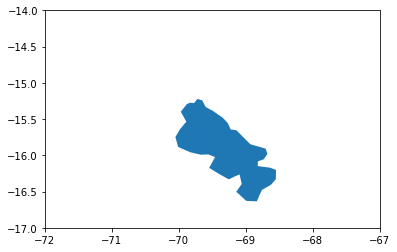

In [31]:
plot_lake_example()

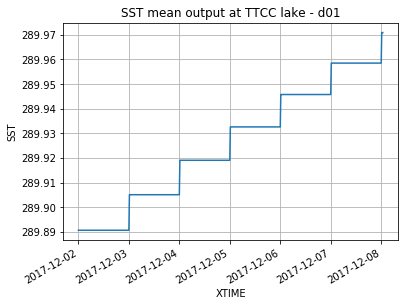

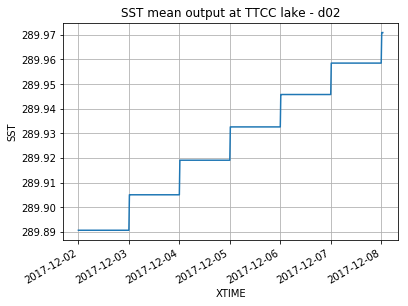

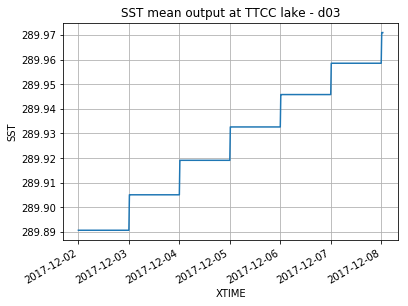

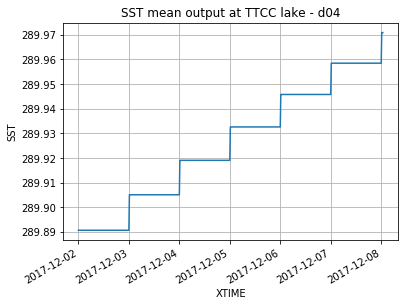

In [21]:
pathTest = '/proj/atm/saltena/runs/run_2019_04_03_1/wrf2'
plt_sst(pathTest)

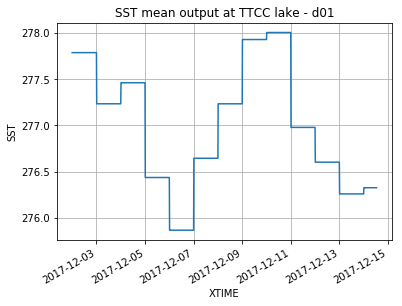

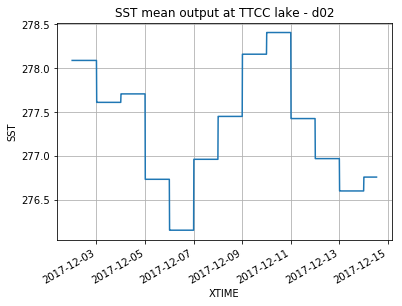

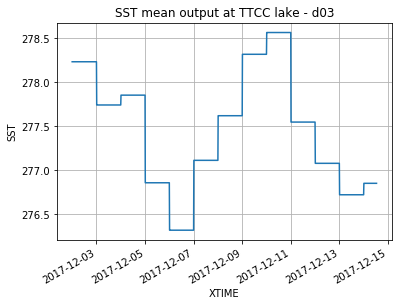

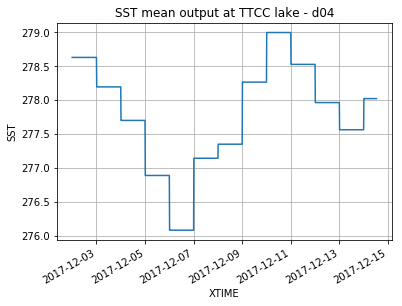

In [14]:
pathTest = '/proj/atm/saltena/runs/run_2019_04_03_1/wrf'
plt_sst(pathTest)